# Formula_1_Rankings_Prediction

In this project i will be working on formula 1 dataset. I downloaded this dataset from kaggle. I will be analyzing about the circuits, driver_standings, pit_stops and many more. I will be using various visualizations, and I will also add some colums to get the insights from the data.

## Introduction

In this analysis we will observe how various columns in out dataset are related. We will also see what is the rank of the formula car according to the grid of the car that is how grid is related to the rank of formula car.

## Downloading the Dataset

I have imported the Formula 1 dataset from kaggle.

In [ ]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [ ]:
dataset_url = 'https://www.kaggle.com/datasets/cbhavik/formula-1-ml-classifier' 

In [ ]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: 
Your Kaggle username: pdheeraj2002
Your Kaggle Key: ········


100%|██████████| 5.54M/5.54M [00:00<00:00, 42.3MB/s]

The dataset has been downloaded and extracted.

In [ ]:
# Change this
data_dir = './formula-1-ml-classifier'

In [ ]:
import os
os.listdir(data_dir)

['constructor_results.csv',
 'driver_standings.csv',
 'pit_stops.csv',
 'qualifying.csv',
 'status.csv',
 'sprint_results.csv',
 'circuits.csv',
 'results.csv',
 'constructor_standings.csv',
 'seasons.csv',
 'lap_times.csv',
 'races.csv',
 'drivers.csv',
 'constructors.csv']

To save and upload our work to Jovian before continuing.

In [ ]:
project_name = "formula-1"

In [ ]:
!pip install jovian --upgrade -q

In [ ]:
import jovian

In [ ]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "pdheeraj1908/formula-1-final" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/pdheeraj1908/formula-1-final


'https://jovian.com/pdheeraj1908/formula-1-final'

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "pdheeraj1908/formula-1-final" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/pdheeraj1908/formula-1-final


'https://jovian.com/pdheeraj1908/formula-1-final'

## Data Preparation and Cleaning

Now I will be converting the csv files to the data frames using pandas. I will go through the data and if I find any missing,  incorrect and invalid data, and do the needful to keep my dataset as accurate as possible. and I will also perform some additional steps like parsing dates, creating additional columns, merging multiple dataset etc.. 

In [ ]:
!pip install pandas --upgrade --quiet
import pandas as pd

In [ ]:
!pip show pandas

Name: pandas
Version: 1.5.2
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: The Pandas Development Team
Author-email: pandas-dev@python.org
License: BSD-3-Clause
Location: /opt/conda/lib/python3.9/site-packages
Requires: numpy, python-dateutil, pytz
Required-by: altair, seaborn, statsmodels


In [ ]:
results_df = pd.read_csv('./formula-1-ml-classifier/results.csv')
results_df

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25455,25461,1076,849,3,6,18,16,16,16,0.0,57,\N,\N,49,18,1:23.882,226.518,11
25456,25462,1076,4,214,14,10,17,17,17,0.0,57,\N,\N,57,2,1:20.846,235.024,11
25457,25463,1076,830,9,1,2,\N,R,18,0.0,38,\N,\N,37,6,1:21.677,232.633,9
25458,25464,1076,20,117,5,17,\N,R,19,0.0,22,\N,\N,17,19,1:25.189,223.042,3


In [ ]:
print('Numbers of rows are {} & Number of columns are {} \n'.format(results_df.shape[0], results_df.shape[1]))
print(results_df.info())

Numbers of rows are 25460 & Number of columns are 18 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25460 entries, 0 to 25459
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         25460 non-null  int64  
 1   raceId           25460 non-null  int64  
 2   driverId         25460 non-null  int64  
 3   constructorId    25460 non-null  int64  
 4   number           25460 non-null  object 
 5   grid             25460 non-null  int64  
 6   position         25460 non-null  object 
 7   positionText     25460 non-null  object 
 8   positionOrder    25460 non-null  int64  
 9   points           25460 non-null  float64
 10  laps             25460 non-null  int64  
 11  time             25460 non-null  object 
 12  milliseconds     25460 non-null  object 
 13  fastestLap       25460 non-null  object 
 14  rank             25460 non-null  object 
 15  fastestLapTime   25460 non-null  object 
 16  fas

In [ ]:
result_df = results_df[['resultId','driverId','laps', 'statusId', 'points', 'positionOrder', 'grid', 'constructorId','milliseconds']].head(200).copy()
result_df

,resultId,driverId,laps,statusId,points,positionOrder,grid,constructorId,milliseconds
0,1,1,58,1,10.0,1,1,1,5690616
1,2,2,58,1,8.0,2,5,2,5696094
2,3,3,58,1,6.0,3,7,3,5698779
3,4,4,58,1,5.0,4,11,4,5707797
4,5,5,58,1,4.0,5,3,1,5708630
...,...,...,...,...,...,...,...,...,...
195,196,20,67,1,1.0,8,9,5,5514173
196,197,15,67,1,0.0,9,4,7,5518032
197,198,3,67,1,0.0,10,13,3,5518499
198,199,4,67,1,0.0,11,5,4,5519474


In [ ]:
result_df.iloc[15]

resultId          16
driverId          16
laps               8
statusId           9
points           0.0
positionOrder     16
grid              22
constructorId     10
milliseconds      \N
Name: 15, dtype: object

In [ ]:
result_df.drop(15,axis=0,inplace=True)
result_df

,resultId,driverId,laps,statusId,points,positionOrder,grid,constructorId,milliseconds
0,1,1,58,1,10.0,1,1,1,5690616
1,2,2,58,1,8.0,2,5,2,5696094
2,3,3,58,1,6.0,3,7,3,5698779
3,4,4,58,1,5.0,4,11,4,5707797
4,5,5,58,1,4.0,5,3,1,5708630
...,...,...,...,...,...,...,...,...,...
195,196,20,67,1,1.0,8,9,5,5514173
196,197,15,67,1,0.0,9,4,7,5518032
197,198,3,67,1,0.0,10,13,3,5518499
198,199,4,67,1,0.0,11,5,4,5519474


In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "pdheeraj1908/formula-1-final" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/pdheeraj1908/formula-1-final


'https://jovian.com/pdheeraj1908/formula-1-final'

## Exploratory Analysis and Visualization

With the help of pandas, matplotlib & seaborn we can analyze and visualize the data. We can compute various functions as sum, range, mean , sd, etc.. to find what story does the data wants to tell us. By different types of visualization plots it makes us easier to see the relationship between the columns and rows of the data.

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Now I have found out the uniques and maximum grid in the dataframe

In [ ]:
result_df.grid.max()

22

In [ ]:
result_df.laps.unique()

array([58, 57, 55, 53, 47, 43, 32, 30, 29, 25, 19,  0, 56, 54, 39,  5,  1,
       40, 66, 65, 41, 34, 21,  8,  7,  6, 24, 76, 75, 72, 67, 59, 36, 70,
       69, 51, 46, 44, 13, 16, 60, 38, 35, 10])

In [ ]:
result_df.laps.max()

76

In [ ]:
result_df.positionOrder.max()

22

With the help of matplotlib & seaborn I made some visualizations to find the relationship between carious columns.

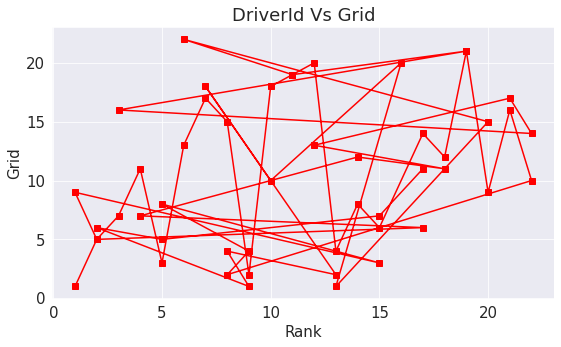

In [ ]:
sns.set_style('darkgrid')
plt.plot(result_df.driverId.head(50), result_df.grid.head(50), 's-r')

plt.xlabel('Rank')
plt.ylabel('Grid')

plt.title("DriverId Vs Grid");

This plot tells us the how ```driverId``` is related to ```grid```. 
But from this line graph plot we cannot get any insights as the plot is clumsy. So let us try different type of plot so that we can take some insights from the plot.

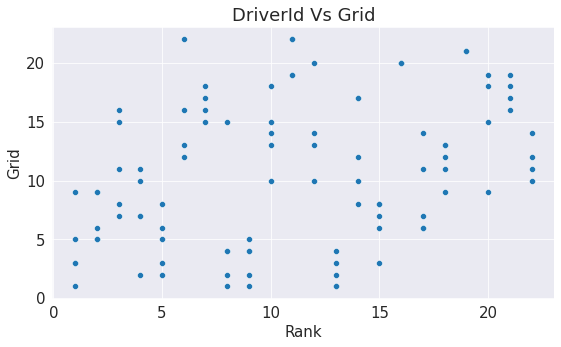

In [ ]:
sns.scatterplot(x=result_df.driverId.head(100), y=result_df.grid.head(100));

plt.xlabel('Rank')
plt.ylabel('Grid')

plt.title("DriverId Vs Grid");

This plot will relates ```driverId``` and ```grid``` columns. Now we can observe that this type of plot is not that clumsy as it was in line plot.

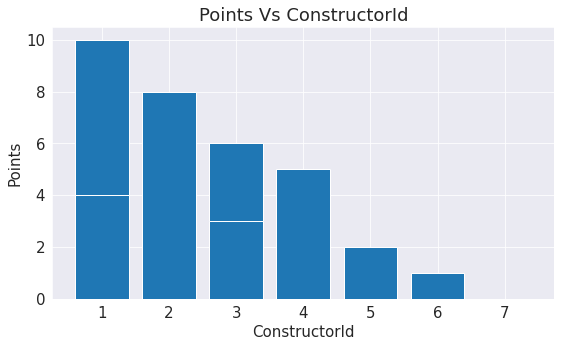

In [ ]:
plt.bar(result_df.constructorId.head(10), result_df.points.head(10))

plt.xlabel('ConstructorId')
plt.ylabel('Points')

plt.title("Points Vs ConstructorId");

Here I made a Line plot between Points Vs ConstructorId, and I also styled the plot and marked the points on the plot.

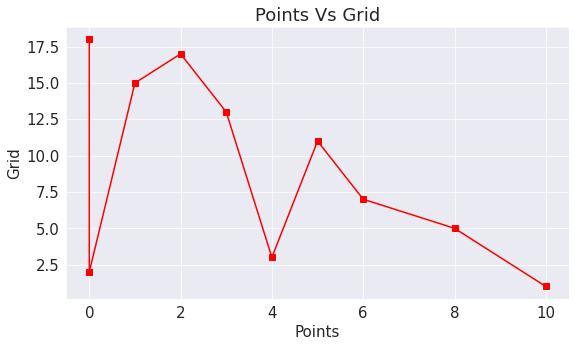

In [ ]:
plt.plot(result_df.points.head(10), result_df.grid.head(10), 's-r')

plt.xlabel('Points')
plt.ylabel('Grid')

plt.title("Points Vs Grid");

The above plot is line plot. It shows the relationship between the points achieved by the car vs in which grid the car has positioned at the start of the race From the graph we can see the car which was in grid one achieved highest number of points and the car which was in last grid achieved the least number of points 

In [ ]:
result_df.statusId.unique()

array([ 1, 11,  5,  4,  3,  7,  8, 10,  2, 12, 20,  9,  6, 21, 22, 14, 23])

Now I made a Scatter plot between Rank Vs Grid, and I labeled the axis and also give the title to the graph.

From the above plot, we can conclude that there are 20 grids in a formula race and the formula car which is on grid one is ranked first in the race.

In [ ]:
!pip install numpy  --quiet
import numpy as np

Here I used histogram plot between ResultId, Laps and Points and I also added the legend to the plot.

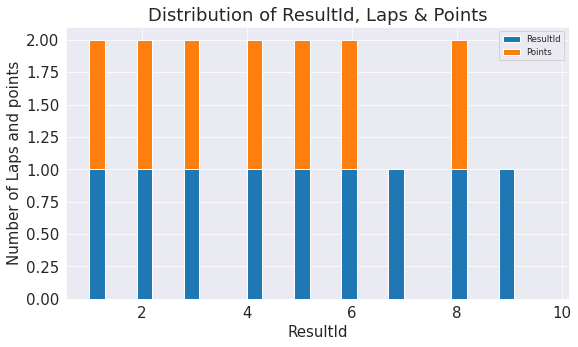

In [ ]:
plt.title('Distribution of ResultId, Laps & Points')

plt.hist([result_df.resultId.head(10), result_df.points.head(20), result_df.laps.head(10)],  
          bins=np.arange(1, 10, 0.3),
         stacked=True);

plt.xlabel('ResultId')
plt.ylabel('Number of Laps and points')
plt.legend(['ResultId', 'Points'], loc='upper right', prop={'size': 8.5});

The above plot is histogram plot, it shows us the relationship between the resultId and number of points of the car and number of laps did each car completed. As this histogram plot tells us how many points and laps did each resultId had made in a single graph.

In [ ]:
result_df.statusId.unique()

array([ 1, 11,  5,  4,  3,  7,  8, 10,  2, 12, 20,  9,  6, 21, 22, 14, 23])

To save and upload our work to Jovian before continuing

In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "pdheeraj1908/formula-1-final" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/pdheeraj1908/formula-1-final


'https://jovian.com/pdheeraj1908/formula-1-final'

## Asking and Answering Questions

Form the dataset I got some data insights and I have answered them in them below. 

#### Q1: What is the relation between the Rank and Grid of the cars ?

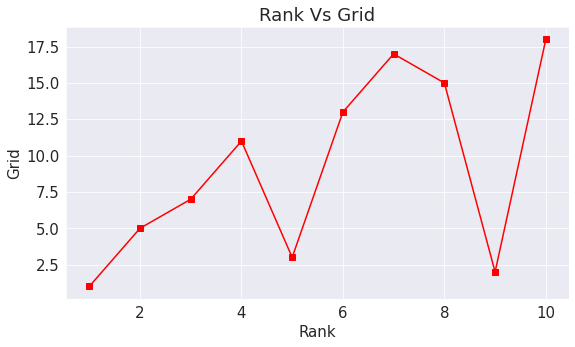

In [ ]:
sns.set_style('darkgrid')
plt.plot(result_df.resultId.head(10), result_df.grid.head(10), 's-r')

plt.xlabel('Rank')
plt.ylabel('Grid')

plt.title("Rank Vs Grid");

From this plot we can see that in the top we can say that in the formula race the formula car that is in the first grid completes the race in first position.

In [ ]:
print("From the above plot we can say that, the the grid one person os ranked {}".format(result_df.resultId[0]))

From the above plot we can say that, the the grid one person os ranked 1


In [ ]:
print('Plot also tells us that the ranks and grid are not directly related, ranks are also related to ConstructorId')

Plot also tells us that the ranks and grid are not directly related, ranks are also related to ConstructorId


#### Q2: How was the points alloted to the cars ? Do the points follow any kind AP , GP or any other relation ?


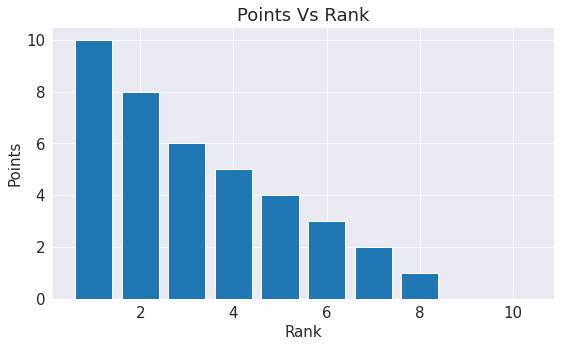

In [ ]:
plt.bar(result_df.resultId.head(10), result_df.points.head(10))

plt.xlabel('Rank')
plt.ylabel('Points')

plt.title("Points Vs Rank");

From this plot we can say that the car which achieved highest rank has gained the most points.

In [ ]:
print('Highest points are given to the Rank {} car'.format(result_df.resultId[0]))

Highest points are given to the Rank 1 car


In [ ]:
print("From the graph we can also interpret that Points & Ranks does not follow any knod of relation as points are given with penalities also")

From the graph we can also interpret that Points & Ranks does not follow any knod of relation as points are given with penalities also


#### Q3: How many unique laps are there in top 100 ranks?

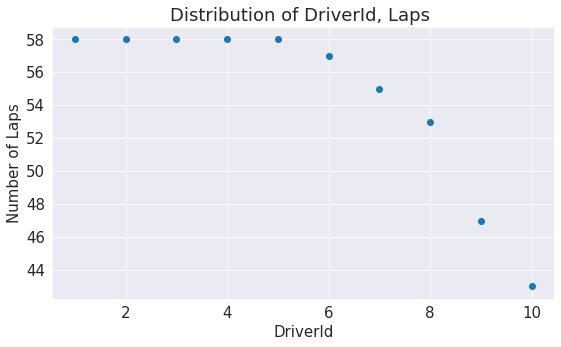

In [ ]:
plt.title('Distribution of DriverId, Laps ')

plt.scatter(result_df.driverId.head(10), result_df.laps.head(10));

plt.xlabel('DriverId')
plt.ylabel('Number of Laps');

From the avbove plot we can tell that the race was a knockout race. The car which is in the last after will be knocked out of the race as we can see not every car can makes same number of laps

In [ ]:
count_laps = result_df.laps.head(100).unique()

In [ ]:
ans = count_laps.shape

In [ ]:
print('There are {} unique laps are there in top 100 ranks!!'.format(ans[0]))

There are 26 unique laps are there in top 100 ranks!!


#### Q4: How many unique Grids are there ?

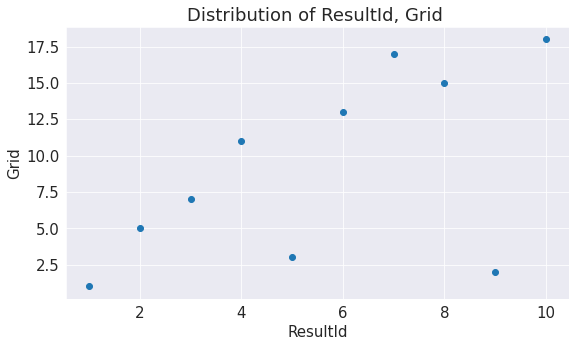

In [ ]:
plt.title('Distribution of ResultId, Grid ')

plt.scatter(result_df.resultId.head(10), result_df.grid.head(10));

plt.xlabel('ResultId')
plt.ylabel('Grid');

From the above plot we can say that the car which is in first grid had ranked one in the race, and car car which was in last grid ranked last in the race. By this we can conclude that there is a relation between the resultId and grid is the car.

In [ ]:
count_grid = result_df.grid.unique()

In [ ]:
ans_grid = count_grid.shape

In [ ]:
print('There are {} unique Grids in dataset'.format(ans_grid[0]))

There are 22 unique Grids in dataset


#### Q5: What is the maximum laps and grid?

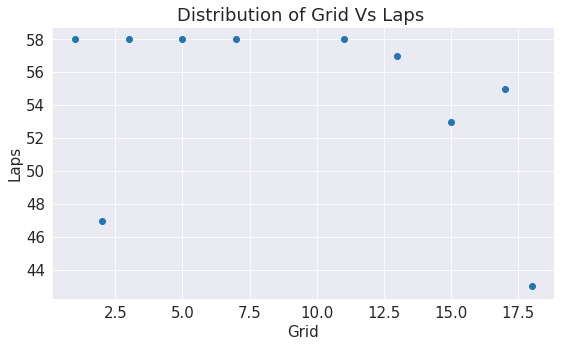

In [ ]:
plt.title('Distribution of Grid Vs Laps ')

plt.scatter(result_df.grid.head(10), result_df.laps.head(10));

plt.xlabel('Grid')
plt.ylabel('Laps');

From Q4 we can say that the car which is in grid one placed first in the race. So, we can also conclude that cars in the top grids make highest number of laps as those cars have high chance to get into the final lap in knockout race.

In [ ]:
max_laps = result_df.laps.max()

In [ ]:
max_grid = result_df.grid.max()

In [ ]:
print('Maximum Grid is {}'.format(max_grid))
print('Maximum Laps is {}'.format(max_laps))

Maximum Grid is 22
Maximum Laps is 76


To save and upload our work to Jovian before continuing.

In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "pdheeraj1908/formula-1-final" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/pdheeraj1908/formula-1-final


'https://jovian.com/pdheeraj1908/formula-1-final'

## Inferences and Conclusion

After importing the data, I started cleaning and preparing the data for the analysis process. I ran some code using pandas library to perform some steps like parsing dates, creating additional columns, merging multiple dataset etc... Then with the help of matplotlib and seaborn libraries I analyzed the data and made some visualizations to get insights from the data. Then by asking some questions I found the relationships between the columns. I also got to understand what story does the dataset want to tells us.

### Observations
  1. Here we can observe the formula car in the top grid completed it's race first.
  2.  The formula car with more points and less penalties is ranked 1st.
  3. As the formula car in the top grid completed the race first, the formula car in the top grid also achieved the maximum points.
  4. The are only 22 grids in the formula race.
  5. Points that formula car gets also depends on the laps that formula car has made.

In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "pdheeraj1908/formula-1-final" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/pdheeraj1908/formula-1-final


'https://jovian.com/pdheeraj1908/formula-1-final'

## References and Future Work

References: The websites that I found useful during this project work are Stackoverflow, W3schools and GFG.

* [Stackoverflow Link](https://stackoverflow.com/questions/7125009/how-to-change-legend-size-with-matplotlib-pyplot) 
* [GFG Link](https://www.geeksforgeeks.org/change-plot-size-in-matplotlib-python/) 
* [GFG Link](https://www.geeksforgeeks.org/bar-plot-in-matplotlib/) 
* [Markdown Guide](https://www.markdownguide.org/basic-syntax/#:~:text=To%20create%20a%20heading%2C%20add,e.g.%2C%20%23%23%23%20My%20Header%20) 
* [W3 Schools](https://www.w3schools.com/python/matplotlib_grid.asp) 
* [Seaborn Library](https://seaborn.pydata.org/tutorial.html)

## Future work
In addition to this project now I will start merging the previous years dataset to the present dataset and start the predict the future rank and grids of the formula cars. As the previous years dataset is available in the formula-1 website and in kaggle. We can come to a conclusion that how the ranks of the formula cars are dependent on the grid, laptime, ConstructorId, and many more parametres. After we define the model using decision trees or XGBooost, we can expect the rank of the formula car by giving the parametres as the inputs.